## Observations and Insights 

1. Since all treatments had 25 mice to start, you can infer that Capomulin was more effective at keeping the mice alive longer since there were many more timepoints tested for Capomulin than the other drugs (except Ramicane).
2. The average final tumor volume was lower for Capomilin than the other drugs so you can infer that it was more effective at reducing or limiting tumor growth (except Ramicane). 
3. The results for Capomulin have less variance so we can infer the drug is more consistent than others in providing similar results to what the study has shown here (except Ramicane). 
4. The results for Capomulin and Ramicane are probably not statistically significant so there may not be a benefit to having both in the same product portfolio as they could compete against each other.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, how='outer', on= "Mouse ID")
# Display the data table for preview
combined_df.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
combined_df['Mouse ID'].value_counts()


g989    13
r811    10
x581    10
a644    10
b879    10
        ..
b447     1
n482     1
l872     1
v199     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#group by Mouse ID
grouped_mouse = combined_df.groupby(['Mouse ID'])
#count unique timespoints & total # of timepoints per mouse ID
id_timepoint_uniquecount = grouped_mouse['Timepoint'].nunique()
id_timepoint_count = grouped_mouse['Timepoint'].count()
#merge timepoint counts together to compare
grouped_timepoint_df = pd.merge(id_timepoint_uniquecount,id_timepoint_count, on ='Mouse ID')
grouped_timepoint_df
#print comparison of unique timepoints vs timepoints counted per each mouse id. 
#If there are no duplicate timepoints, the # of unique timepoints should be equal to the # of timepoints counted. 
print(grouped_timepoint_df.loc[id_timepoint_uniquecount != id_timepoint_count])

          Timepoint_x  Timepoint_y
Mouse ID                          
g989                8           13


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(combined_df.loc[(combined_df['Mouse ID'] == 'g989'),:])


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop(combined_df[combined_df["Mouse ID"]== "g989"].index)



In [6]:
# Checking the number of mice in the clean DataFrame.
#verify drop
cleaned_df['Mouse ID'].value_counts()

k403    10
g570    10
a644    10
b879    10
f345    10
        ..
b447     1
n482     1
l872     1
v199     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_regimen = cleaned_df.groupby("Drug Regimen")
grouped_regimen_tumor_mean = pd.Series(grouped_regimen['Tumor Volume (mm3)'].mean(), name = 'Mean Tumor Volume (mm3)')
grouped_regimen_tumor_median = pd.Series(grouped_regimen['Tumor Volume (mm3)'].median(), name = 'Median')
grouped_regimen_tumor_var = pd.Series(grouped_regimen['Tumor Volume (mm3)'].var(), name = "Variance")
grouped_regimen_tumor_stddev = pd.Series(grouped_regimen['Tumor Volume (mm3)'].std(), name = "Standard Dev")
grouped_regimen_tumor_sem = pd.Series(grouped_regimen['Tumor Volume (mm3)'].sem(), name = "SEM")

# Assemble the resulting series into a single summary dataframe.

grouped_regimen_summarystats_df = pd.concat([grouped_regimen_tumor_mean,grouped_regimen_tumor_median,grouped_regimen_tumor_var,grouped_regimen_tumor_stddev,grouped_regimen_tumor_sem], axis=1)
                                               
grouped_regimen_summarystats_df

,Mean Tumor Volume (mm3),Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_regimen_summarystats_agg = cleaned_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
grouped_regimen_summarystats_agg['Tumor Volume (mm3)'].sort_values(['mean'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<AxesSubplot:title={'center':'total # of timepoints tested per drug regimen'}, xlabel='Drug Regimen'>

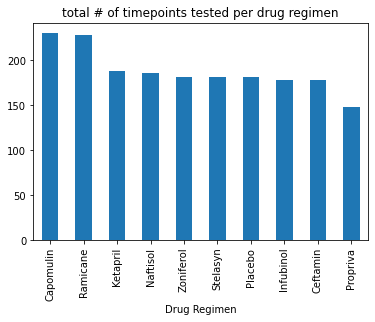

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

grouped_regimen_timepoints_sum = grouped_regimen['Timepoint'].count()
grouped_regimen_timepoints_sum 

grouped_regimen_timepoints_sum.sort_values(ascending = False).plot(kind='bar', title= 'total # of timepoints tested per drug regimen')


([<matplotlib.axis.XTick at 0x1f843cb0208>,
 [Text(0.0, 0, 'Capomulin'),
  Text(1.0, 0, 'Ceftamin'),
  Text(2.0, 0, 'Infubinol'),
  Text(3.0, 0, 'Ketapril'),
  Text(4.0, 0, 'Naftisol'),
  Text(5.0, 0, 'Placebo'),
  Text(6.0, 0, 'Propriva'),
  Text(7.0, 0, 'Ramicane'),
  Text(8.0, 0, 'Stelasyn'),
  Text(9.0, 0, 'Zoniferol')])

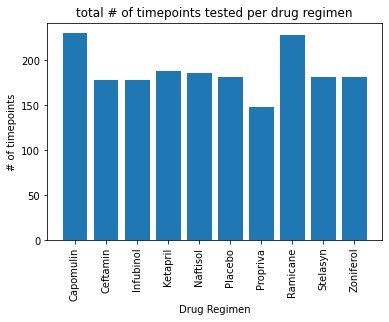

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen= []
index= grouped_regimen_timepoints_sum.index
for i in index:
        drug_regimen.append(i)
    

plt.bar(drug_regimen, grouped_regimen_timepoints_sum)
plt.title('total # of timepoints tested per drug regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("# of timepoints")
tick_locations = [value for value in drug_regimen] 
plt.xticks(tick_locations, drug_regimen,rotation='vertical')


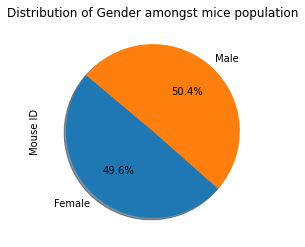

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouped_gender = cleaned_df.groupby("Sex") 
grouped_gender_sum = grouped_gender['Mouse ID'].nunique()

grouped_gender_sum.plot(kind='pie', title= 'Distribution of Gender amongst mice population',autopct="%1.1f%%",shadow=True,startangle=140)


Text(0.5, 1.0, 'Distribution of Gender amongst mice population')

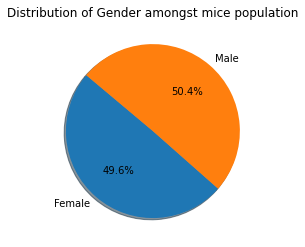

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
plt.pie(grouped_gender_sum, labels= labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Distribution of Gender amongst mice population')

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#group by ID
grouped_id = cleaned_df.groupby('Mouse ID')

# Start by getting the last (greatest) timepoint for each mouse
grouped_id_max_timepoint = grouped_id['Timepoint'].max()
grouped_id_max_timepoint 

mouse_id = []
index= grouped_id_max_timepoint.index
for i in index:
        mouse_id.append(i)
        
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
modified_df = pd.merge(cleaned_df, grouped_id_max_timepoint, on= 'Mouse ID', how='inner')
modified_df = modified_df.rename(columns={'Timepoint_y': 'Max Timepoint', 'Timepoint_x':'Timepoint'})
modified_df


for mouse in mouse_id:
    #find max timepoint in timepoint
    max_timepoint_df = modified_df.loc[(modified_df['Max Timepoint'] == modified_df['Timepoint']), :]

#create new df with all the final values for each mouse
max_timepoint_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [24]:
max_timepoint_df.groupby('Drug Regimen').count()


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
Drug Regimen,,,,,,,,
Capomulin,25,25,25,25,25,25,25,25
Ceftamin,25,25,25,25,25,25,25,25
Infubinol,25,25,25,25,25,25,25,25
Ketapril,25,25,25,25,25,25,25,25
Naftisol,25,25,25,25,25,25,25,25
Placebo,25,25,25,25,25,25,25,25
Propriva,24,24,24,24,24,24,24,24
Ramicane,25,25,25,25,25,25,25,25
Stelasyn,24,24,24,24,24,24,24,24


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_Capomulin = []
final_tumor_Ramicane= []
final_tumor_Infubinol = []
final_tumor_Ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in max_timepoint_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        final_tumor_Capomulin.append(row['Tumor Volume (mm3)']) 
    elif row['Drug Regimen'] == 'Ramicane':
        final_tumor_Ramicane.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Infubinol':
        final_tumor_Infubinol.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ceftamin':
        final_tumor_Ceftamin.append(row['Tumor Volume (mm3)'])
        
    # add subset 
    
# Determine outliers using upper and lower bounds for Capomulin
final_tumor_Capomulin_med = np.median(final_tumor_Capomulin)
final_tumor_Capomulin_q3, final_tumor_Capomulin_q1 = np.percentile(final_tumor_Capomulin, [75 ,25])
final_tumor_Capomulin_IQR = final_tumor_Capomulin_q3 - final_tumor_Capomulin_q1
final_tumor_Capomulin_IQR_UL = final_tumor_Capomulin_q3 + (final_tumor_Capomulin_IQR * 1.5)
final_tumor_Capomulin_IQR_LL = final_tumor_Capomulin_q1 - (final_tumor_Capomulin_IQR * 1.5)
print('median final tumor value for Capomulin is : ' +str(final_tumor_Capomulin_med))
print( 'Acceptable Range for Capomulin is ' + str(final_tumor_Capomulin_IQR_LL) + ' - ' + str(final_tumor_Capomulin_IQR_UL))
print(final_tumor_Capomulin )
print('outliers =' + str([x for x in final_tumor_Capomulin if x > final_tumor_Capomulin_IQR_UL or x < final_tumor_Capomulin_IQR_LL]))
print('-------------------------')

# Determine outliers using upper and lower bounds for Ramicane
final_tumor_Ramicane_med = np.median(final_tumor_Ramicane)
final_tumor_Ramicane_q3, final_tumor_Ramicane_q1 = np.percentile(final_tumor_Ramicane, [75 ,25])
final_tumor_Ramicane_IQR = final_tumor_Ramicane_q3 - final_tumor_Ramicane_q1
final_tumor_Ramicane_IQR_UL = final_tumor_Ramicane_q3 + (final_tumor_Ramicane_IQR * 1.5)
final_tumor_Ramicane_IQR_LL = final_tumor_Ramicane_q1 - (final_tumor_Ramicane_IQR * 1.5)
print('median final tumor value for Ramicane is : ' +str(final_tumor_Ramicane_med))
print( 'Acceptable Range for Ramicane is ' + str(final_tumor_Ramicane_IQR_LL) + ' - ' + str(final_tumor_Ramicane_IQR_UL))
print(final_tumor_Ramicane )
print('outliers =' + str([x for x in final_tumor_Ramicane if x > final_tumor_Ramicane_IQR_UL or x < final_tumor_Ramicane_IQR_LL]))
print('-------------------------')

# Determine outliers using upper and lower bounds for Infubinol
final_tumor_Infubinol_med = np.median(final_tumor_Infubinol)
final_tumor_Infubinol_q3, final_tumor_Infubinol_q1 = np.percentile(final_tumor_Infubinol, [75 ,25])
final_tumor_Infubinol_IQR = final_tumor_Infubinol_q3 - final_tumor_Infubinol_q1
final_tumor_Infubinol_IQR_UL = final_tumor_Infubinol_q3 + (final_tumor_Infubinol_IQR * 1.5)
final_tumor_Infubinol_IQR_LL = final_tumor_Infubinol_q1 - (final_tumor_Infubinol_IQR * 1.5)
print('median final tumor value for Infubinol is : ' +str(final_tumor_Infubinol_med))
print( 'Acceptable Range for Infubinol is ' + str(final_tumor_Infubinol_IQR_LL) + ' - ' + str(final_tumor_Infubinol_IQR_UL))
print(final_tumor_Infubinol)
print('outliers =' + str([x for x in final_tumor_Infubinol if x > final_tumor_Infubinol_IQR_UL or x < final_tumor_Infubinol_IQR_LL]))
print('-------------------------')

# Determine outliers using upper and lower bounds for Ceftamin
final_tumor_Ceftamin_med = np.median(final_tumor_Ceftamin)
final_tumor_Ceftamin_q3, final_tumor_Ceftamin_q1 = np.percentile(final_tumor_Ceftamin, [75 ,25])
final_tumor_Ceftamin_IQR = final_tumor_Ceftamin_q3 - final_tumor_Ceftamin_q1
final_tumor_Ceftamin_IQR_UL = final_tumor_Ceftamin_q3 + (final_tumor_Ceftamin_IQR * 1.5)
final_tumor_Ceftamin_IQR_LL = final_tumor_Ceftamin_q1 - (final_tumor_Ceftamin_IQR * 1.5)
print('median final tumor value for Ceftamin is : ' +str(final_tumor_Ceftamin_med))
print( 'Acceptable Range for Infubinol is ' + str(final_tumor_Ceftamin_IQR_LL) + ' - ' + str(final_tumor_Ceftamin_IQR_UL))
print(final_tumor_Ceftamin)
print('outliers =' + str([x for x in final_tumor_Ceftamin if x > final_tumor_Ceftamin_IQR_UL or x < final_tumor_Ceftamin_IQR_LL]))

median final tumor value for Capomulin is : 38.125164399999996
Acceptable Range for Capomulin is 20.70456164999999 - 51.83201549
[23.34359787, 28.48403281, 28.43096411, 30.48598484, 31.02392294, 31.896238399999998, 32.37735684, 33.32909778, 34.45529799, 37.31184577, 36.04104736, 37.07402422, 38.84687569, 38.93963263, 38.98287774, 38.75326548, 38.125164399999996, 39.95234669, 40.65812366, 40.1592203, 40.72857787, 41.48300765, 41.58152074, 47.68596303, 46.53920617]
outliers =[]
-------------------------
median final tumor value for Ramicane is : 36.56165229
Acceptable Range for Ramicane is 17.912664470000003 - 54.30681135
[22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.56046955, 31.09533505, 33.39765251, 32.97852192, 33.56240217, 36.13485243, 38.81036633, 37.22565033, 36.37451039, 36.56165229, 37.31123552, 38.34200823, 38.407618299999996, 40.65900627, 40.66771292, 45.22086888, 43.04754260000001, 43.41938077, 43.16637266, 44.18345092]
outliers =[]
--------------------

([<matplotlib.axis.XTick at 0x1b476abb198>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

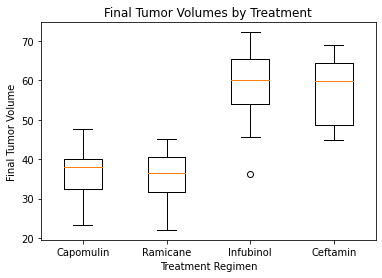

In [100]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplotddata = [final_tumor_Capomulin,final_tumor_Ramicane,final_tumor_Infubinol,final_tumor_Ceftamin ]
plt.boxplot(boxplotddata) 
plt.xlabel("Treatment Regimen")
plt.ylabel("Final Tumor Volume")
plt.title("Final Tumor Volumes by Treatment")
plt.xticks([1,2,3,4],treatments)


## Line and Scatter Plots

x401    10
i738    10
b742    10
i557    10
u364    10
m957    10
g288    10
s710    10
v923    10
t565    10
w914    10
r554    10
l897    10
s185    10
y793    10
b128    10
l509    10
j119    10
r944    10
g316    10
m601    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64


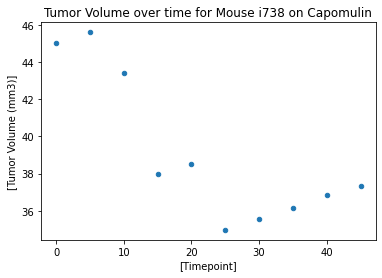

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = modified_df.loc[(modified_df['Drug Regimen'] == 'Capomulin'), :]
print(Capomulin_df['Mouse ID'].value_counts())

MouseID = "i738"                               
MouseID_df = Capomulin_df.loc[(Capomulin_df['Mouse ID'] == MouseID), :]
MouseID_df.plot(kind='scatter', x=['Timepoint'], y=['Tumor Volume (mm3)'], title = 'Tumor Volume over time for Mouse ' + MouseID + ' on Capomulin')




The correlation between both factors is 0.84


Text(36, 22, 'y = 0.74x + -10.15')

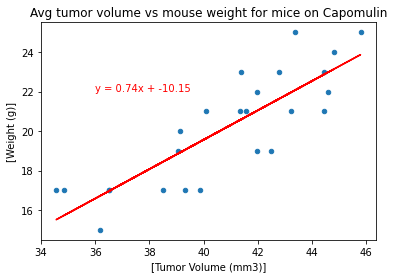

In [139]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouse_grouped_df = Capomulin_df.groupby('Mouse ID').mean()
capomulin_mouse_grouped_df.plot(kind='scatter', x=['Tumor Volume (mm3)'], y=['Weight (g)'], title = 'Avg tumor volume vs mouse weight for mice on Capomulin')

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_mouse_grouped_df['Tumor Volume (mm3)'],capomulin_mouse_grouped_df['Weight (g)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_mouse_grouped_df['Tumor Volume (mm3)'], capomulin_mouse_grouped_df['Weight (g)'])
regress_values = capomulin_mouse_grouped_df['Tumor Volume (mm3)'] * slope + intercept
plt.plot(capomulin_mouse_grouped_df['Tumor Volume (mm3)'],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(36,22),fontsize=10,color="red")

## Correlation and Regression

In [130]:
#moved to above

The correlation between both factors is 0.84
y = 0.74x + -10.15
